# DDOS attack Detection
### Creating a platform that can detect DDOS attacks


In [2]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn import metrics

In [3]:
# reading Data

df=pd.read_csv("dataset_sdn.csv")
df


,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0


## I. Data Preprocessing

In [5]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [6]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


In [7]:
# column names
column_names= df.columns
column_names

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

Text(0, 0.5, 'Count')

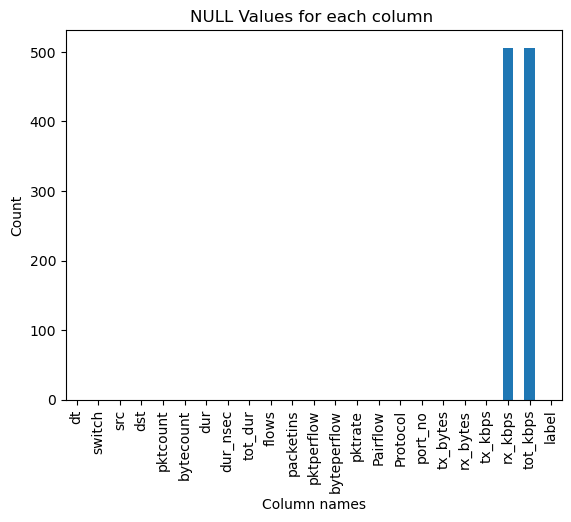

In [8]:
# Null values sum 
df.isnull().sum().plot.bar()
plt.title("NULL Values for each column ")
plt.xlabel("Column names")
plt.ylabel("Count")

In [9]:
# Dropping rows having null values
df=df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103839 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           103839 non-null  int64  
 1   switch       103839 non-null  int64  
 2   src          103839 non-null  object 
 3   dst          103839 non-null  object 
 4   pktcount     103839 non-null  int64  
 5   bytecount    103839 non-null  int64  
 6   dur          103839 non-null  int64  
 7   dur_nsec     103839 non-null  int64  
 8   tot_dur      103839 non-null  float64
 9   flows        103839 non-null  int64  
 10  packetins    103839 non-null  int64  
 11  pktperflow   103839 non-null  int64  
 12  byteperflow  103839 non-null  int64  
 13  pktrate      103839 non-null  int64  
 14  Pairflow     103839 non-null  int64  
 15  Protocol     103839 non-null  object 
 16  port_no      103839 non-null  int64  
 17  tx_bytes     103839 non-null  int64  
 18  rx_bytes     103839 non-null 

Text(0.5, 1.0, 'Traffic for normal and Malicious traffic')

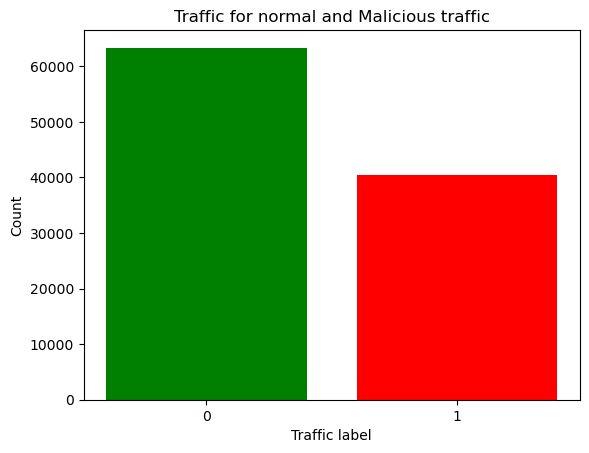

In [11]:
# Doing analysis for malicious and normal traffic 
gp=df.groupby('label')['label'].count()
plt.bar(list(gp.index),list(gp.values),color=['g','r'])
plt.xticks(list(gp.index))
plt.xlabel("Traffic label")
plt.ylabel("Count")
plt.title("Traffic for normal and Malicious traffic")

In [12]:
# Columns containing object(string) type data
# Port no column also does not do much so ignoring it also
object_col= list(df.select_dtypes(include=['object']).columns)
object_col=object_col+['port_no']
print(object_col)
data=df.drop(columns=object_col)

# seperating data based on protocol
udp_df = df[df['Protocol']=='UDP'].drop(columns=object_col)
tcp_df = df[df['Protocol']=='TCP'].drop(columns=object_col)
icmp_df = df[df['Protocol']=='ICMP'].drop(columns=object_col)
icmp_df

['src', 'dst', 'Protocol', 'port_no']


,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
46116,26657,8,20,1960,21,201000000,2.120100e+10,3,10,0,0,0,1,5327,5327,0,0.0,0.0,0
46117,26657,8,20,1960,21,201000000,2.120100e+10,3,10,0,0,0,1,5457,3104,0,0.0,0.0,0
46118,26657,8,20,1960,21,201000000,2.120100e+10,3,10,0,0,0,1,3227,3185,0,0.0,0.0,0
46119,26657,8,20,1960,21,201000000,2.120100e+10,3,10,0,0,0,1,3357,1122,0,0.0,0.0,0
46120,26657,8,20,1960,21,43000000,2.104300e+10,3,10,0,0,0,1,5327,5327,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,15209,12720,1,1.0,2.0,0
104341,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,15099,14693,1,1.0,2.0,0
104342,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,3409,3731,0,0.0,0.0,0
104343,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,15209,12720,1,1.0,2.0,0


# II. Model Comparison

In [14]:
# importin modules for train test split
from sklearn.model_selection import train_test_split

In [15]:
udp_train,udp_test, udp_train_label, udp_test_label= train_test_split(udp_df[udp_df.columns[:-1]],udp_df['label'],test_size=0.3,random_state=42)

In [16]:
# splitting traing and testing data
tcp_train,tcp_test, tcp_train_label, tcp_test_label= train_test_split(tcp_df[tcp_df.columns[:-1]],tcp_df['label'],test_size=0.3,random_state=42)

In [17]:
# splitting traing and testing data
icmp_train,icmp_test, icmp_train_label, icmp_test_label= train_test_split(icmp_df[icmp_df.columns[:-1]],icmp_df['label'],test_size=0.3,random_state=42)

# K means 

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Initialize a DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Accuracy'])

# Function to train and evaluate the K-Means model
def train_and_evaluate_kmeans(X, model_name):
    # Initialize the K-Means model with n_init set explicitly
    kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)  # Adjust n_clusters as needed
    
    # Fit the model to the data
    kmeans.fit(X)
    
    # Predict cluster labels
    cluster_labels = kmeans.predict(X)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Append results to the DataFrame with score rounded to two decimals
    results.loc[len(results)] = [model_name, round(silhouette_avg, 2)]

# Train and evaluate for each dataset
train_and_evaluate_kmeans(udp_train, 'UDP')
train_and_evaluate_kmeans(tcp_train, 'TCP')
train_and_evaluate_kmeans(icmp_train, 'ICMP')

# Display results as a table
print(tabulate(results, headers='keys', tablefmt='pretty'))


+---+-------+----------+
|   | Model | Accuracy |
+---+-------+----------+
| 0 |  UDP  |   0.6    |
| 1 |  TCP  |   0.6    |
| 2 | ICMP  |   0.62   |
+---+-------+----------+


# Random Forest

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from tabulate import tabulate
results = pd.DataFrame(columns=['Model', 'Accuracy'])
def train_and_evaluate_random_forest(X_train, y_train, X_test, y_test, model_name):
    rf_model = RandomForestClassifier(
        n_estimators=10,        
        max_depth=2,            
        min_samples_split=50,  
        random_state=42,
        bootstrap=True          
    )
    
    # Fit the model to the training data
    rf_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = rf_model.predict(X_test)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Perform cross-validation to validate the model
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)  # 5-fold cross-validation
    cv_accuracy = cv_scores.mean()  # Average cross-validation accuracy
    
    # Append results to the DataFrame with accuracy rounded to two decimals
    results.loc[len(results)] = [model_name, round(cv_accuracy, 2)]
train_and_evaluate_random_forest(udp_train, udp_train_label, udp_test, udp_test_label, 'Random Forest (UDP)')
train_and_evaluate_random_forest(tcp_train, tcp_train_label, tcp_test, tcp_test_label, 'Random Forest (TCP)')
train_and_evaluate_random_forest(icmp_train, icmp_train_label, icmp_test, icmp_test_label, 'Random Forest (ICMP)')

# Display results as a table
print(tabulate(results, headers='keys', tablefmt='pretty'))


+---+----------------------+----------+
|   |        Model         | Accuracy |
+---+----------------------+----------+
| 0 | Random Forest (UDP)  |   0.99   |
| 1 | Random Forest (TCP)  |   0.85   |
| 2 | Random Forest (ICMP) |   1.0    |
+---+----------------------+----------+


# Decision tree

In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from tabulate import tabulate

results = pd.DataFrame(columns=['Model', 'Accuracy'])

def train_and_evaluate_decision_tree(X_train, y_train, X_test, y_test, model_name):
    dt_model = DecisionTreeClassifier(
        max_depth=1,          
        min_samples_split=20, 
        random_state=42
    )
    
    # Fit the model to the training data
    dt_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = dt_model.predict(X_test)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Perform cross-validation to validate the model
    cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5)  # 5-fold cross-validation
    cv_accuracy = cv_scores.mean()  # Average cross-validation accuracy
    
    # Append results to the DataFrame with accuracy rounded to two decimals
    results.loc[len(results)] = [model_name, round(cv_accuracy, 2)]

# Train and evaluate for each dataset
train_and_evaluate_decision_tree(udp_train, udp_train_label, udp_test, udp_test_label, 'Decision Tree (UDP)')
train_and_evaluate_decision_tree(tcp_train, tcp_train_label, tcp_test, tcp_test_label, 'Decision Tree (TCP)')
train_and_evaluate_decision_tree(icmp_train, icmp_train_label, icmp_test, icmp_test_label, 'Decision Tree (ICMP)')

# Display results as a table
print(tabulate(results, headers='keys', tablefmt='pretty'))


+---+----------------------+----------+
|   |        Model         | Accuracy |
+---+----------------------+----------+
| 0 | Decision Tree (UDP)  |   0.99   |
| 1 | Decision Tree (TCP)  |   0.73   |
| 2 | Decision Tree (ICMP) |   1.0    |
+---+----------------------+----------+


## KNN

In [25]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize a DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Accuracy'])

# Function to train and evaluate the KNN model
def train_and_evaluate_knn(X, y, test_data, test_labels, model_name):
    # Initialize the KNN model
    knn = KNeighborsClassifier(n_neighbors=7)
    
    # Fit the model to the training data
    knn.fit(X, y)
    
    # Predict on the test set
    y_pred = knn.predict(test_data)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(test_labels, y_pred)
    
    # Append results to the DataFrame with accuracy rounded to two decimals
    results.loc[len(results)] = [model_name, round(accuracy, 2)]

# Train and evaluate for each dataset
train_and_evaluate_knn(udp_train, udp_train_label, udp_test, udp_test_label, 'UDP')
train_and_evaluate_knn(tcp_train, tcp_train_label, tcp_test, tcp_test_label, 'TCP')
train_and_evaluate_knn(icmp_train, icmp_train_label, icmp_test, icmp_test_label, 'ICMP')

# Display results as a table
print(tabulate(results, headers='keys', tablefmt='pretty'))


+---+-------+----------+
|   | Model | Accuracy |
+---+-------+----------+
| 0 |  UDP  |   0.96   |
| 1 |  TCP  |   0.8    |
| 2 | ICMP  |   0.92   |
+---+-------+----------+


# SVM

In [27]:
from sklearn import svm
from sklearn.metrics import accuracy_score

results = []

# SVM for UDP
clf_udp = svm.SVC(kernel='poly')
clf_udp.fit(udp_train, udp_train_label)
udp_accuracy = clf_udp.score(udp_test, udp_test_label)
results.append({'Protocol': 'UDP', 'Accuracy': round(udp_accuracy, 2)})

# SVM for TCP
clf_tcp = svm.SVC()
clf_tcp.fit(tcp_train, tcp_train_label)
tcp_accuracy = accuracy_score(clf_tcp.predict(tcp_test), tcp_test_label)
results.append({'Protocol': 'TCP', 'Accuracy': round(tcp_accuracy, 2)})

# SVM for ICMP
clf_icmp = svm.SVC()
clf_icmp.fit(icmp_train, icmp_train_label)
icmp_accuracy = accuracy_score(clf_icmp.predict(icmp_test), icmp_test_label)
results.append({'Protocol': 'ICMP', 'Accuracy': round(icmp_accuracy, 2)})

# Print the results as a table using tabulate
print(tabulate(results, headers='keys', tablefmt='pretty'))


+----------+----------+
| Protocol | Accuracy |
+----------+----------+
|   UDP    |   0.66   |
|   TCP    |   0.67   |
|   ICMP   |   0.8    |
+----------+----------+


In [67]:
import pandas as pd
from tabulate import tabulate
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# Initialize a DataFrame to store all results
combined_results = pd.DataFrame(columns=['Model', 'Protocol', 'Score'])

# Function to train and evaluate K-Means
def train_and_evaluate_kmeans(X, model_name, protocol):
    kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    combined_results.loc[len(combined_results)] = [model_name, protocol, round(silhouette_avg, 2)]

# Function to train and evaluate Random Forest
def train_and_evaluate_random_forest(X_train, y_train, X_test, y_test, model_name, protocol):
    rf_model = RandomForestClassifier(n_estimators=10, max_depth=2, min_samples_split=50, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    combined_results.loc[len(combined_results)] = [model_name, protocol, round(accuracy, 2)]

# Function to train and evaluate Decision Tree
def train_and_evaluate_decision_tree(X_train, y_train, X_test, y_test, model_name, protocol):
    dt_model = DecisionTreeClassifier(max_depth=1, min_samples_split=20, random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    combined_results.loc[len(combined_results)] = [model_name, protocol, round(accuracy, 2)]

# Function to train and evaluate KNN
def train_and_evaluate_knn(X, y, test_data, test_labels, model_name, protocol):
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(X, y)
    y_pred = knn.predict(test_data)
    accuracy = accuracy_score(test_labels, y_pred)
    combined_results.loc[len(combined_results)] = [model_name, protocol, round(accuracy, 2)]

# Function to train and evaluate SVM
def train_and_evaluate_svm(X_train, y_train, X_test, y_test, model_name, protocol):
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    accuracy = accuracy_score(clf.predict(X_test), y_test)
    combined_results.loc[len(combined_results)] = [model_name, protocol, round(accuracy, 2)]

# Train and evaluate for each dataset
datasets = [
    (udp_train, udp_train_label, udp_test, udp_test_label, 'UDP'),
    (tcp_train, tcp_train_label, tcp_test, tcp_test_label, 'TCP'),
    (icmp_train, icmp_train_label, icmp_test, icmp_test_label, 'ICMP')
]

for X_train, y_train, X_test, y_test, protocol in datasets:
    train_and_evaluate_kmeans(X_train, 'K-Means', protocol)
    train_and_evaluate_random_forest(X_train, y_train, X_test, y_test, 'Random Forest', protocol)
    train_and_evaluate_decision_tree(X_train, y_train, X_test, y_test, 'Decision Tree', protocol)
    train_and_evaluate_knn(X_train, y_train, X_test, y_test, 'KNN', protocol)
    train_and_evaluate_svm(X_train, y_train, X_test, y_test, 'SVM', protocol)

# Calculate average scores for each model
average_results = combined_results.groupby('Model')['Score'].mean().reset_index()
average_results['Score'] = average_results['Score'].round(2)
# Display only the model and average score
average_results = average_results.rename(columns={'Score': 'Accuracy Score'})
print(tabulate(average_results, headers='keys', tablefmt='pretty'))


+---+---------------+----------------+
|   |     Model     | Accuracy Score |
+---+---------------+----------------+
| 0 | Decision Tree |      0.9       |
| 1 |    K-Means    |      0.61      |
| 2 |      KNN      |      0.89      |
| 3 | Random Forest |      0.95      |
| 4 |      SVM      |      0.74      |
+---+---------------+----------------+


# Features

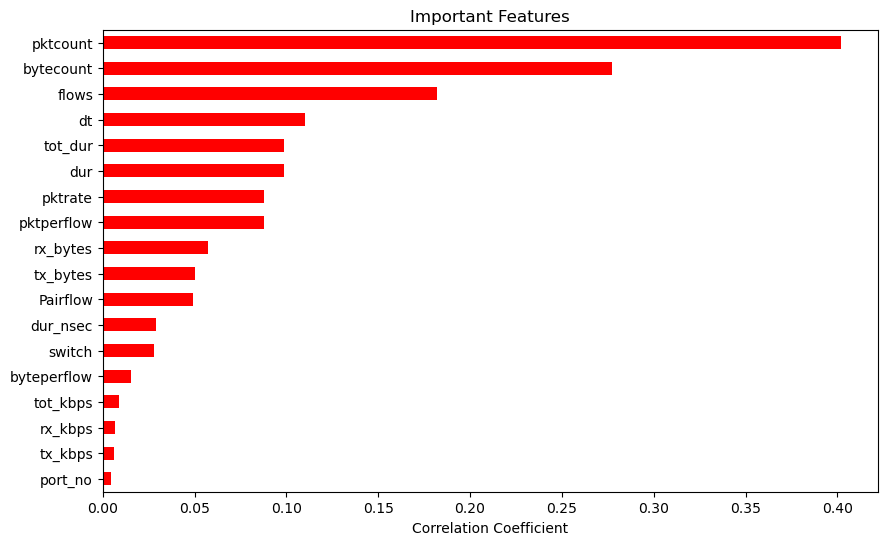

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('dataset_sdn.csv')

# Drop non-numeric columns
numeric_data = data.select_dtypes(include=['number'])

# If 'label' is in the DataFrame, ensure it is numeric
if 'label' in data.columns and pd.api.types.is_numeric_dtype(data['label']):
    numeric_data['label'] = data['label']

# Handle missing values by filling with column means
numeric_data.fillna(numeric_data.mean(), inplace=True)

# Separate features and target variable
X_cleaned = numeric_data.drop(columns=['label'])
y = numeric_data['label']

# Calculate absolute correlations with the target variable
correlations = X_cleaned.corrwith(y).abs().sort_values(ascending=False)

# Select the top 10 features based on correlation
top_10_features = correlations.head(18)

# Plot the top 10 correlated features
plt.figure(figsize=(10, 6))
top_10_features.plot(kind='barh', color='red')
plt.xlabel('Correlation Coefficient')
plt.title('Important Features')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()


# Ensembled model

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Load dataset
data = pd.read_csv('dataset_sdn.csv')

# Select features and target variable
features = ['dt', 'flows', 'pktcount', 'bytecount', 'pktrate', 'pktperflow', 'dur', 'rx_bytes']
X = data[features]
y = data['label']

# Handle missing values
X = X.fillna(X.mean())

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Initialize models with reduced complexity
models = [
    ('knn', KNeighborsClassifier(n_neighbors=3)),  # Reduced neighbors
    ('decision_tree', DecisionTreeClassifier(max_depth=5, random_state=42)),  # Pruned tree
    ('random_forest', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42))  # Pruned RF
]

# Combine models using VotingClassifier
ensemble_model = VotingClassifier(estimators=models, voting='soft')

# Perform cross-validation to evaluate model
cv_scores = cross_val_score(ensemble_model, X_train_scaled, y_train, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")

# Train the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Predict on the test set and evaluate
y_pred = ensemble_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy:.2f}")

# Function to classify input using the ensemble model
def classify_input():
    """
    Classify input data using the ensemble model.
    Prompts the user for feature inputs and returns predictions.
    """
    input_data = []
    try:
        for feature in features:
            value = float(input(f"Enter {feature}: "))
            input_data.append(value)
    except ValueError:
        print("Invalid input! Please enter numeric values.")
        return

    # Create input DataFrame for prediction and apply scaling
    input_data_scaled = scaler.transform([input_data])

    # Predict using the ensemble model
    prediction = ensemble_model.predict(input_data_scaled)
    prediction_proba = ensemble_model.predict_proba(input_data_scaled)

    # Output prediction and probabilities
    print(f"Prediction: {prediction[0]} (Probability: {prediction_proba[0][1]:.2f} for Unsafe, {prediction_proba[0][0]:.2f} for Safe)")
    print("Output: Intrusion detected!!" if prediction[0] == 1 else "Output: Safe")

# Call the function to classify input
classify_input()


Cross-Validation Accuracy: 0.98
Ensemble Model Accuracy: 0.98


Enter dt:  5675
Enter flows:  456456
Enter pktcount:  456
Enter bytecount:  346
Enter pktrate:  876546
Enter pktperflow:  56
Enter dur:  454
Enter rx_bytes:  78976


Prediction: 0 (Probability: 0.40 for Unsafe, 0.60 for Safe)
Output: Safe


# Score

In [33]:
from sklearn.metrics import f1_score

# Predict on the test set
y_pred = ensemble_model.predict(X_test_scaled)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print F1-score
print(f"F1-Score: {f1:.2f}")


F1-Score: 0.98


In [34]:
from sklearn.metrics import classification_report

# Predict on the test set and evaluate
y_pred = ensemble_model.predict(X_test_scaled)
print(f"Ensemble Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Display classification report
print(classification_report(y_test, y_pred, target_names=['Safe', 'Unsafe']))


Ensemble Model Accuracy: 0.98
              precision    recall  f1-score   support

        Safe       0.99      0.98      0.99     19112
      Unsafe       0.97      0.99      0.98     12192

    accuracy                           0.98     31304
   macro avg       0.98      0.98      0.98     31304
weighted avg       0.98      0.98      0.98     31304



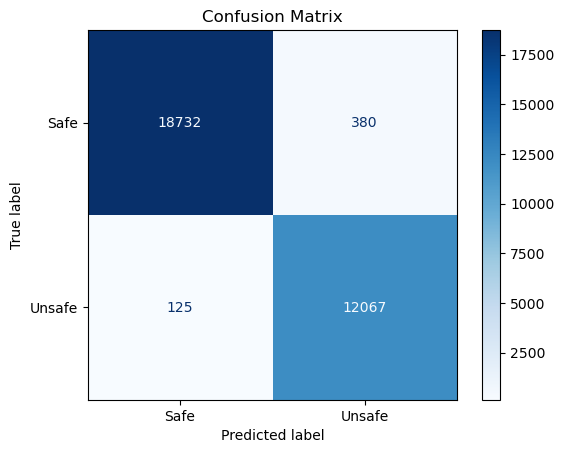

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# After making predictions
y_pred = ensemble_model.predict(X_test_scaled)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Safe', 'Unsafe'])

# Plot the confusion matrix
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
